In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
%matplotlib inline

In [67]:
# replacing string in to binary
df = pd.read_csv('cleaned_data.csv')
df['change_in_meds'] = df['change_in_meds'].replace('Ch', 1)
df['change_in_meds'] = df['change_in_meds'].replace('No', 0)

In [68]:
df['citoglipton'].value_counts()

not_prescribed    99492
Name: citoglipton, dtype: int64

In [69]:
df['examide'].value_counts()

not_prescribed    99492
Name: examide, dtype: int64

In [70]:
to_drop = ['citoglipton','examide']

df.drop(to_drop, inplace=True, axis=1)

In [71]:
df = df.drop(['Unnamed: 0'], axis=1)


In [72]:
# replacing string in to binary
df['diabates_med_prescribed'] = df['diabates_med_prescribed'].replace('No', 0)
df['diabates_med_prescribed'] = df['diabates_med_prescribed'].replace('Yes', 1)
df['gender'] = df['gender'].replace('Male', 0)
df['gender'] = df['gender'].replace('Female', 1)

#replace age code intervals 0- 10: 1, 10-20:2 etc
for i in range (0,10):
    df['age']=df['age'].replace('['+str(10*i)+ '-' +str(10*(i+1))+')', i+1)
df.head(3)

,race,gender,age,days_in_hospital,num_lab_procedures,num_not_lab_procedures,num_current_medications,num_outpatient_appointments,num_previous_emergencies,num_inpatient_overnight_stays,...,tolazamide,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change_in_meds,diabates_med_prescribed,readmitted
0,Caucasian,1,1,1,41,0,1,0,0,0,...,not_prescribed,not_prescribed,not_prescribed,not_prescribed,not_prescribed,not_prescribed,not_prescribed,0,0,NO
1,Caucasian,1,2,3,59,0,18,0,0,0,...,not_prescribed,dosage_increased,not_prescribed,not_prescribed,not_prescribed,not_prescribed,not_prescribed,1,1,>30
2,AfricanAmerican,1,3,2,11,5,13,2,0,1,...,not_prescribed,not_prescribed,not_prescribed,not_prescribed,not_prescribed,not_prescribed,not_prescribed,0,1,NO


In [73]:
meds = ['metformin', 'nateglinide', 'chlorpropamide', 'glimepiride',
        'acetohexamide', 'glipizide','repaglinide','glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
        'acarbose', 'miglitol', 'troglitazone','tolazamide','insulin',  'glyburide_metformin',
        'glipizide_metformin', 'glimepiride_pioglitazone', 
        'metformin_rosiglitazone', 'metformin_pioglitazone']

for col in meds:
    df[col]=df[col].replace('not_prescribed', 0)
    df[col]=df[col].replace('no_change_dosage', 0)
    df[col]=df[col].replace('dosage_increased', 1)
    df[col]=df[col].replace('dosage_decreased', 1)

In [74]:
column_names1 =['race']
new_values = {'AfricanAmerican': 0, 'Asian':1, 'Caucasian': 3, 'Hispanic': 4, 'Other': 5 }
for medicine in column_names1:
    df[medicine] = df[medicine].replace(new_values)

In [75]:

# train test split
from sklearn.model_selection import train_test_split
X = df.drop('readmitted', axis = 1)
y = df.readmitted
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [76]:
#size of x train
len(X_train)

79593

In [77]:
# builds multiple decision trees to get final outcome. We used 1000 decision trees as we had 
#an abundant of data so to improve accuracy of model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1000)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
#accuracy of model
rfc.score(X_test,y_test)

0.552791597567717

In [49]:
#confusion matrix to vizualize performance of the algorithm
from sklearn.metrics import confusion_matrix

In [53]:
#summary of predicioton results
rfc_pred= rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[  43  885 1308]
 [  46 2734 4275]
 [  17 1919 8672]]




NameError: name 'classification_report' is not defined

Text(69.0, 0.5, 'Truth')

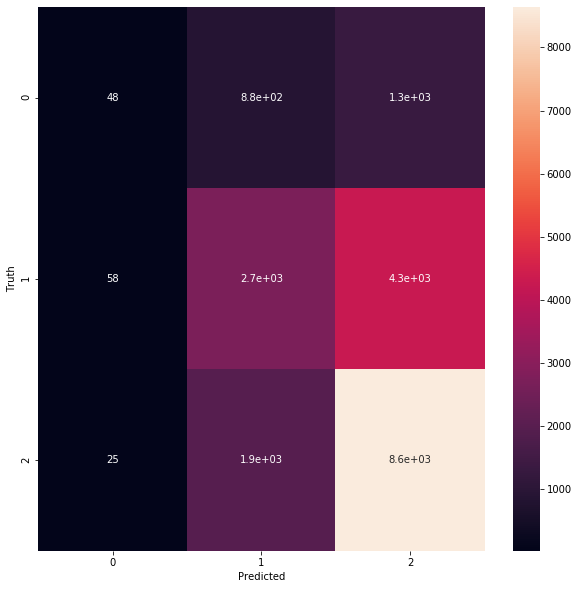

In [49]:
#plot visually
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
# The model predicted 48 times 0 and truth was 0, model predicted 25 times 0, but truth was 2  )

In [ ]:
from sklearn.feature_selection import SelectFromModel

Feature ranking:
('Unnamed: 0', 0.06046703891981939)
('race', 0.49201256877281224)
('gender', 0.1084367015156993)
('age', 0.29308561809615635)
('days_in_hospital', 0.023713293802631225)
('num_lab_procedures', 0.022284778892881527)


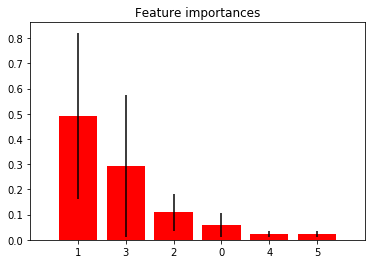

In [63]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=6,
                           random_state=0,
                           shuffle=False)



rfc.fit(X, y)
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for feature in zip(columns, rfc.feature_importances_):
    print(feature)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

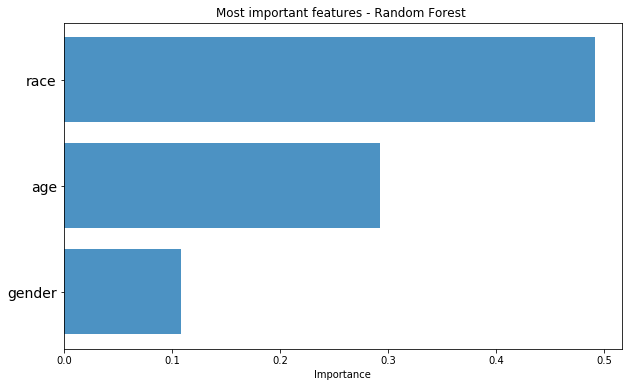

In [65]:
feature_names = X_train.columns
feature_imports = rfc.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(3, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()